In [4]:
import os
import json
import wget

import numpy as np
import pandas as pd

from astropy import units as u
from astropy.coordinates import SkyCoord, FK5

In [5]:
full_df = pd.read_csv('04-BBCFITS/SALT2mu_DES+LOWZ_G10.FITRES', 
                 delim_whitespace=True, skiprows=7, comment='#')
lowz_df = full_df[full_df.IDSURVEY != 10]

# Host info from the Open Supernova Catalog for the low-z sample
osc_df = pd.read_csv('osc_results.csv')
osc_df.rename({'SN_Name':'CID'}, axis=1, inplace=True)
osc_df.CID.replace('SN', '', inplace=True, regex=True)

# merge both dataframes
lowz_df = pd.merge(lowz_df, osc_df, on='CID', how='outer')
lowz_df.head()

VARNAMES:     CID  CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA     zHEL  \
0       SN:  2004ef       1        64     0   NaN              1  0.03098   
1       SN:  2006et       2        64     0   NaN              1  0.02258   
2       SN:  2006ev       3        64     0   NaN              1  0.02873   
3       SN:  2006ef       4        64     0   NaN              1  0.01768   
4       SN:  2005lu       5        64     0   NaN              1  0.03224   

   zHELERR     zCMB  ...  biasCor_mu  biasCorErr_mu  biasCor_mB  biasCor_x1  \
0      0.0  0.02979  ...      -0.032          0.003      -0.008      -0.014   
1      0.0  0.02160  ...      -0.025          0.004      -0.005       0.015   
2      0.0  0.02762  ...      -0.030          0.003      -0.007      -0.009   
3      0.0  0.01682  ...      -0.010          0.002      -0.012      -0.007   
4      0.0  0.03154  ...      -0.031          0.007      -0.006       0.037   

   biasCor_c  biasScale_muCOV  IDSAMPLE      Host_Name   Host_RA  Host_DEC  
0      0.008            0.956         0      UGC 12158  340.5442   19.9969  
1      0.007            0.959         0        NGC 232   10.6875  -23.5611  
2      0.007            0.957         0      UGC 11758  322.7417   13.9858  
3     -0.001            0.951         0        NGC 809   31.0792   -8.7356  
4      0.010            0.956         0  MCG -03-07-40   39.0167  -17.2639  

[5 rows x 64 columns]

In [6]:
lowz_df[["CID", "RA", "Host_RA", "DECL", "Host_DEC"]]

CID          RA   Host_RA       DECL  Host_DEC
0    2004ef  340.541748  340.5442  19.994410   19.9969
1    2006et   10.690750   10.6875 -23.558281  -23.5611
2    2006ev  322.747192  322.7417  13.989250   13.9858
3    2006ef   31.081369   31.0792  -8.728470   -8.7356
4    2005lu   39.015640   39.0167 -17.263750  -17.2639
..      ...         ...       ...        ...       ...
117  2006eq  322.154999  322.1567   1.228110    1.2302
118  2006lu  138.822998  138.8208 -25.600100  -25.6000
119  2006py  340.424988  340.4250  -0.136917   -0.1369
120  2008bq  100.260002  100.2625 -38.038601  -38.0356
121  2008gp   50.752998   50.7500   1.361890    1.3653

[122 rows x 5 columns]

In [15]:
import winsound
import requests

def make_noise():
    duration = 1000  # milliseconds
    freq = 440  # Hz
    winsound.Beep(freq, duration)

webhookurl = r'https://discord.com/api/webhooks/xxxxxxxxx'

def notify(message = 'done!'):
    requests.post(webhookurl, json={"content": "<@xxxxxxxxxx> " + message})
    make_noise()

## Cutouts

In [8]:
from hostphot.cutouts import download_images
import traceback

In [9]:
#surveys = ['DES', 'PS1', 'GALEX', '2MASS', 'unWISE']
surveys = ['SDSS']

In [14]:
size = 3
overwrite = True
for survey in surveys:
    for name, host_ra, host_dec in zip(lowz_df.CID, 
                                    lowz_df.Host_RA, 
                                    lowz_df.Host_DEC):
        download_images(name, host_ra, host_dec, size=size,
                            overwrite=overwrite, survey=survey)

In [16]:
notify()

In [17]:
downloaded_list = os.listdir("images")
downloaded_list = [dir for dir in downloaded_list if len(os.listdir(os.path.join("images", dir))) != 0 and 'SDSS_g.fits' in os.listdir(os.path.join('images', dir))]

In [18]:
leftover_df = lowz_df[~lowz_df.CID.isin(downloaded_list)]
leftover_df

VARNAMES:     CID  CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA     zHEL  \
1         SN:  2006et       2        64     0   NaN              1  0.02258   
2         SN:  2006ev       3        64     0   NaN              1  0.02873   
4         SN:  2005lu       5        64     0   NaN              1  0.03224   
7         SN:  2005iq       8        64     0   NaN              1  0.03404   
10        SN:  2006ax      11        64     0   NaN              1  0.01650   
11        SN:  2007ca      12        64     0   NaN              1  0.01413   
12        SN:  2006hb      13        64     0   NaN              1  0.01496   
31        SN:  2002hd      34        63     0   NaN              1  0.03088   
32        SN:  2002he      35        63     0   NaN              1  0.02456   
33        SN:  2002hu      36        63     0   NaN              1  0.03000   
35        SN:  2002kf      38        63     0   NaN              1  0.01930   
37        SN:  2003ch      40        63     0   NaN              1  0.02862   
38        SN:  2003fa      41        63     0   NaN              1  0.04039   
41        SN:  2003iv      44        63     0   NaN              1  0.03430   
45        SN:  2005lz      48        64     0   NaN              1  0.03997   
55        SN:  2006mp      60        64     0   NaN              1  0.02291   
59        SN:  2006qo      64        64     0   NaN              1  0.02852   
61        SN:  2006td      66        64     0   NaN              1  0.01587   
65        SN:  2007co      70        64     0   NaN              1  0.02696   
87        SN:  2008at      93        65     1   NaN              1  0.03489   
90        SN:  2008cf      96        65     1   NaN              1  0.04606   
92        SN:  2008gb      98        65     1   NaN              1  0.03698   
95        SN:  2008hs     101        65     1   NaN              1  0.01730   
96        SN:   2009D     102        65     1   NaN              1  0.02500   
97        SN:  2009ad     103        65     1   NaN              1  0.02840   
98        SN:  2009ds     104        65     1   NaN              1  0.01928   
102       SN:  2009kk     108        66     1   NaN              1  0.01285   
104       SN:  2009le     110        66     1   NaN              1  0.01778   
110       SN:  2010dt     116        66     1   NaN              1  0.05289   
111       SN:  2004eo     117         5     1   NaN              1  0.01552   
115       SN:  2005bo     122         5     1   NaN              1  0.01443   
116       SN:  2006bh     123         5     1   NaN              1  0.01077   
118       SN:  2006lu     125         5     1   NaN              1  0.05446   
120       SN:  2008bq     128         5     1   NaN              1  0.03314   
121       SN:  2008gp     129         5     1   NaN              1  0.03341   

     zHELERR     zCMB  ...  biasCor_mu  biasCorErr_mu  biasCor_mB  biasCor_x1  \
1        0.0  0.02160  ...      -0.025          0.004      -0.005       0.015   
2        0.0  0.02762  ...      -0.030          0.003      -0.007      -0.009   
4        0.0  0.03154  ...      -0.031          0.007      -0.006       0.037   
7        0.0  0.03295  ...       0.031          0.003      -0.039      -0.010   
10       0.0  0.01773  ...       0.028          0.004      -0.030      -0.011   
11       0.0  0.01515  ...      -0.032          0.012      -0.000       0.003   
12       0.0  0.01496  ...      -0.017          0.005      -0.009      -0.037   
31       0.0  0.03190  ...      -0.018          0.002      -0.013      -0.009   
32       0.0  0.02484  ...      -0.013          0.002      -0.014      -0.025   
33       0.0  0.02924  ...       0.016          0.002      -0.028      -0.010   
35       0.0  0.01948  ...      -0.007          0.002      -0.013      -0.002   
37       0.0  0.02922  ...      -0.019          0.002      -0.013      -0.008   
38       0.0  0.04016  ...       0.003          0.006      -0.019       0.123   
41       0.0  0.03358  ..

## Check

In [31]:
from astropy.io import fits
import matplotlib.pyplot as plt
from hostphot.utils import plot_fits
import glob

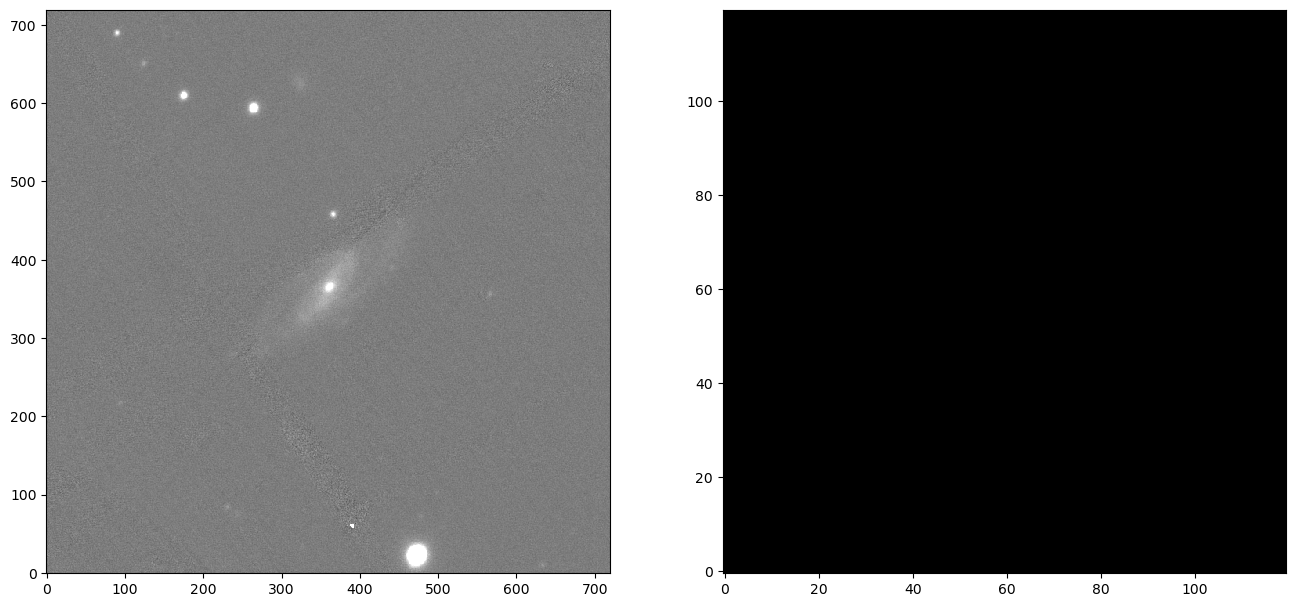

In [22]:
img = fits.open('images/2001az/PS1_g.fits')
img2 = fits.open('images/2008gp/GALEX_FUV.fits')

data = img[0].data
data2 = img2[0].data
m, s = np.nanmean(data), np.nanstd(data)
m2, s2 = np.nanmean(data2), np.nanstd(data2)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(data, interpolation='nearest',
            cmap='gray',
            vmin=m-s, vmax=m+s,
            origin='lower')
axs[1].imshow(data2, interpolation='nearest',
            cmap='gray',
            vmin=m2-s2, vmax=m2+s2,
            origin='lower')
plt.show()

In [36]:
des_snes = []
sne_folders = glob.glob("images/*")
for sne in sne_folders:
    for file in os.listdir(sne):
        if os.path.basename(file).startswith("DES"):
            des_snes.append(sne)
            break
des_snes

['images\\2004ey',
 'images\\2005hc',
 'images\\2005lu',
 'images\\2006ef',
 'images\\2006eq',
 'images\\2006et',
 'images\\2006hb',
 'images\\2006oa',
 'images\\2006ob',
 'images\\2006on',
 'images\\2006py',
 'images\\2007nq',
 'images\\2008gl',
 'images\\2009D',
 'images\\2009le',
 'images\\2010A']

In [5]:
name = "2003ch"
fits_files = []
for survey in surveys:
    survey_files = glob.glob(f'images/{name}/{survey}*')
    for file in survey_files:
        if os.path.basename(file).startswith(survey) and file.endswith('.fits'):
            fits_files.append(file)

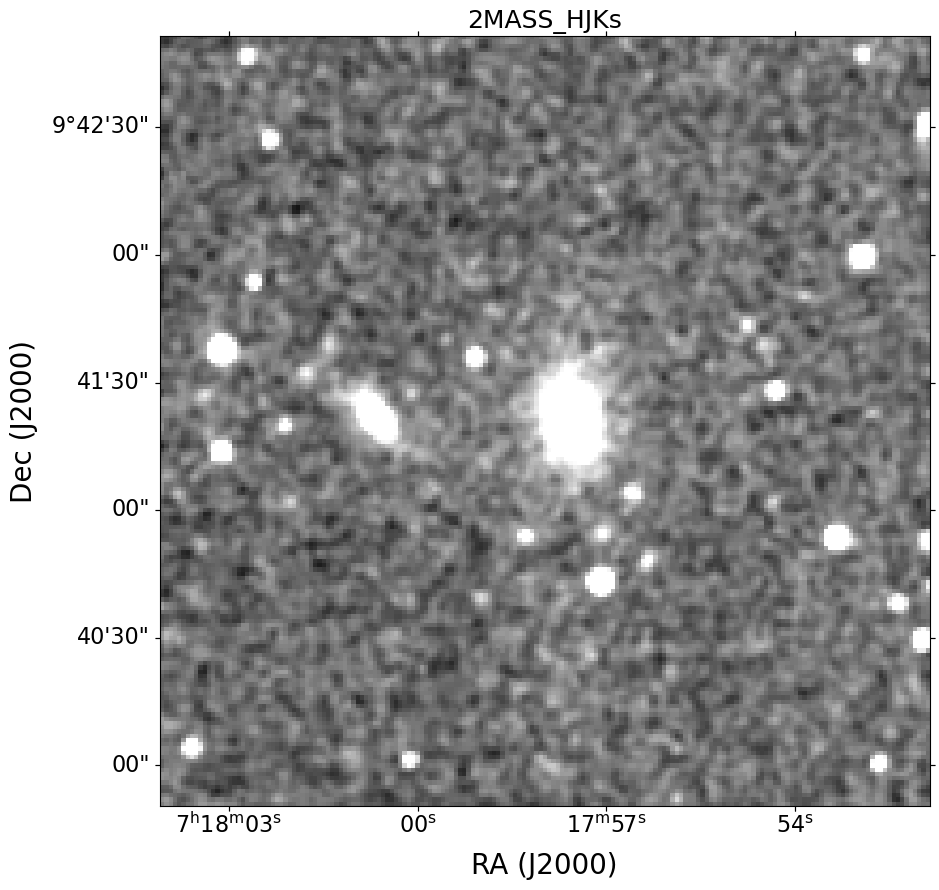

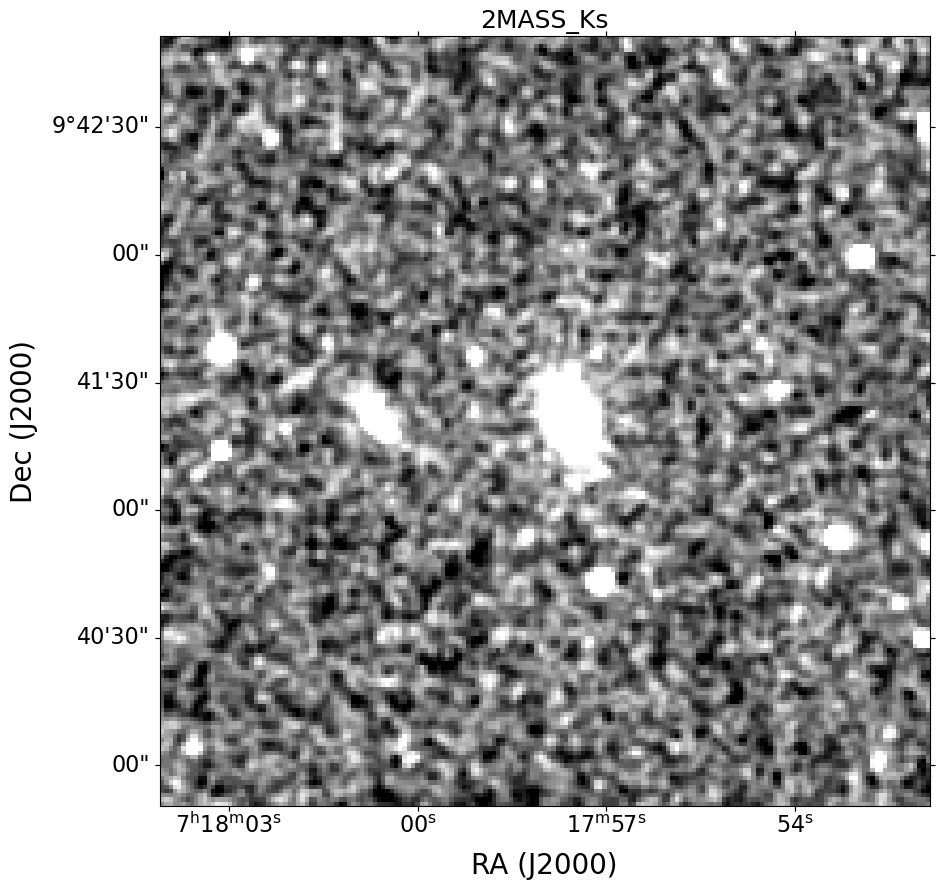

In [6]:
for file in fits_files:
    # use one band per survey as there are many images
    if '_r.fits' in file or '_FUV.fits' in file or "_W1" in file or "Ks" in file:
        plot_fits(file)

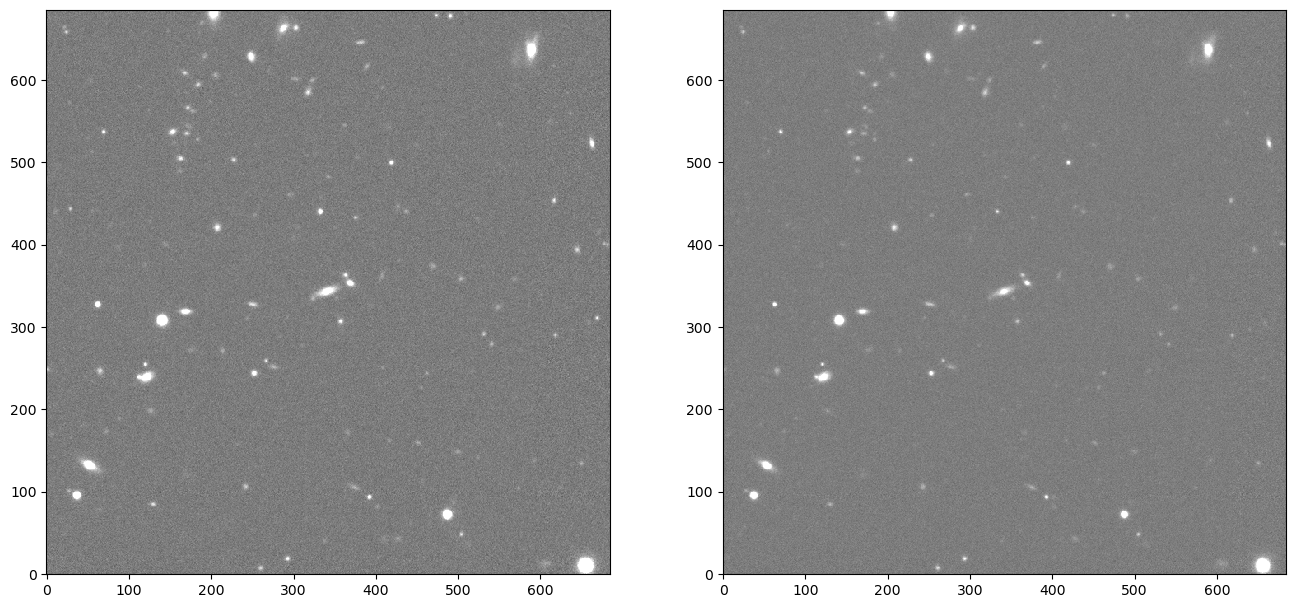

In [ ]:
img = fits.open('images/2001a/DES_i.fits')
img2 = fits.open('images/1345594/DES_r.fits')

data = img[0].data
data2 = img2[0].data
m, s = np.nanmean(data), np.nanstd(data)
m2, s2 = np.nanmean(data2), np.nanstd(data2)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(data, interpolation='nearest',
            cmap='gray',
            vmin=m-s, vmax=m+s,
            origin='lower')
axs[1].imshow(data2, interpolation='nearest',
            cmap='gray',
            vmin=m2-s2, vmax=m2+s2,
            origin='lower')
plt.show()

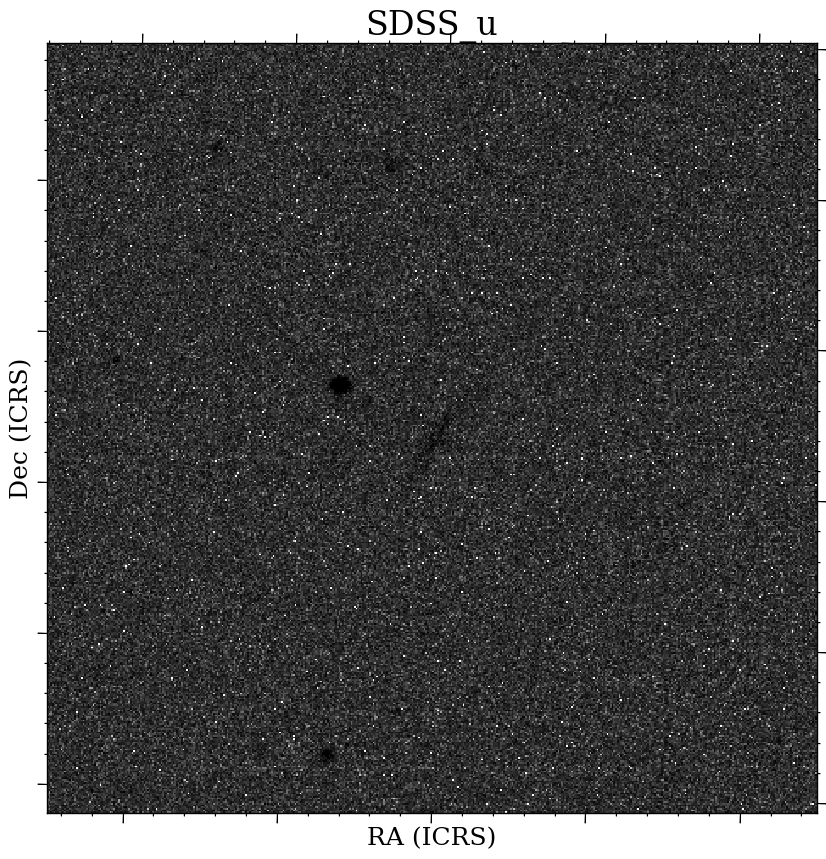

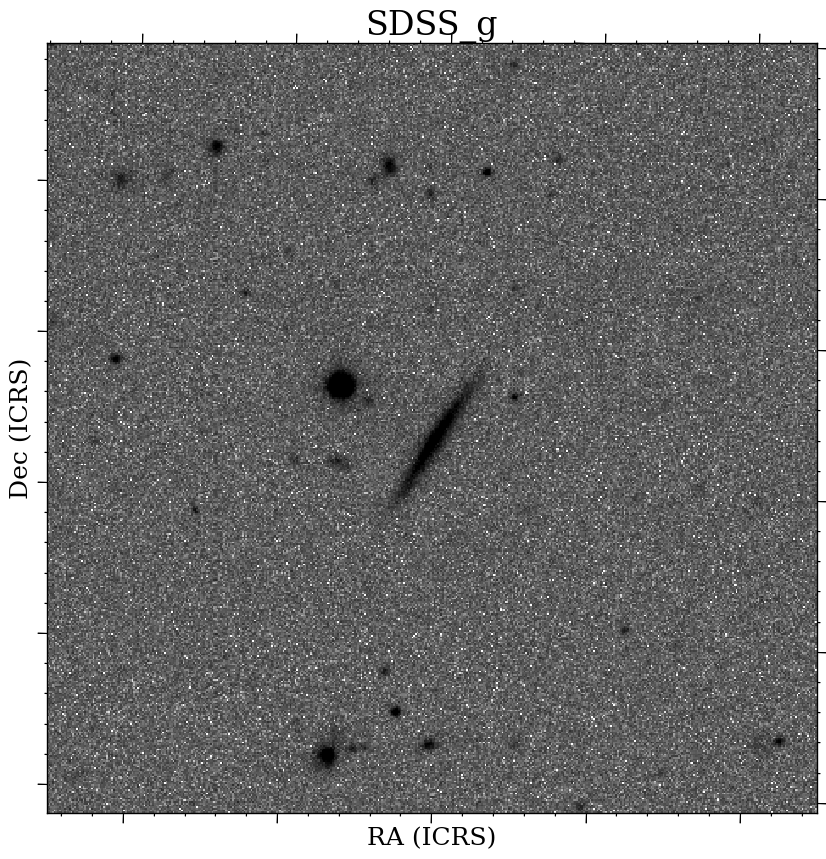

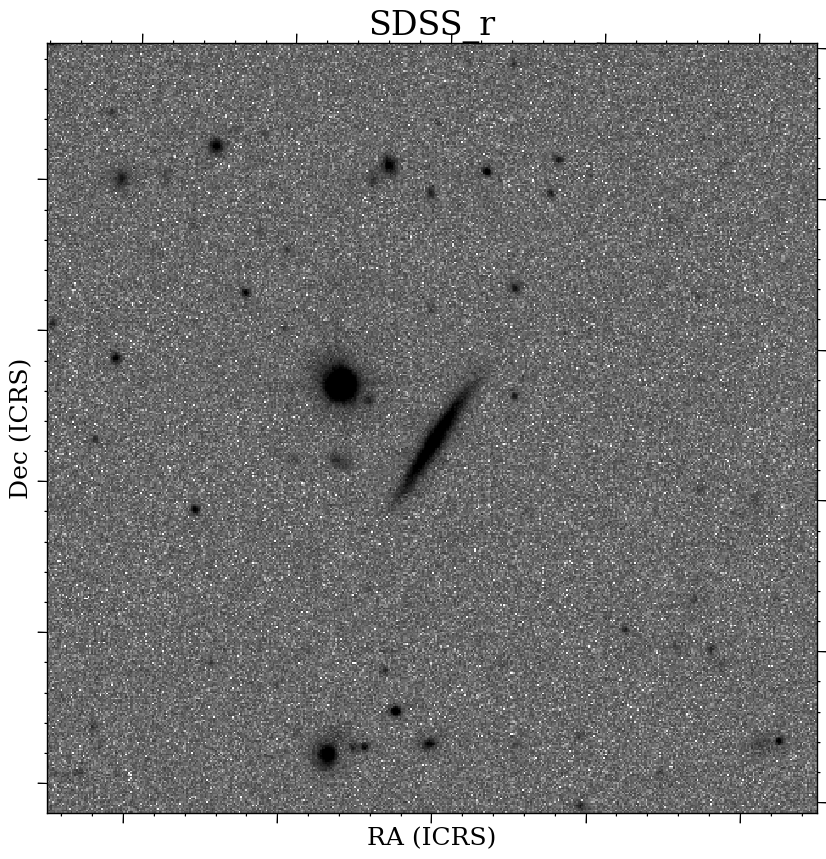

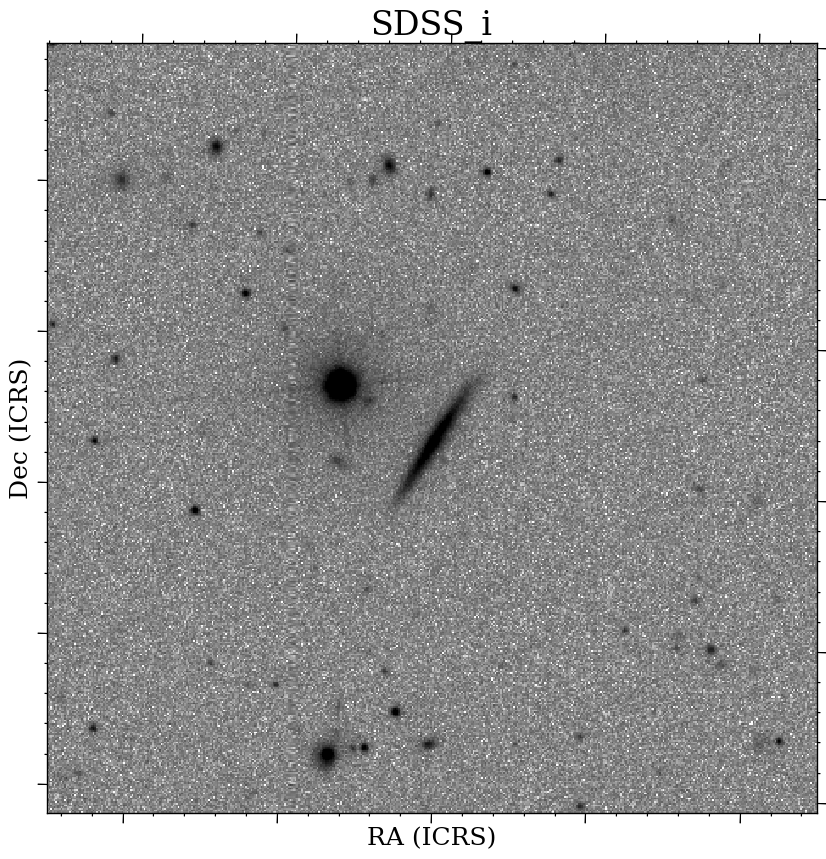

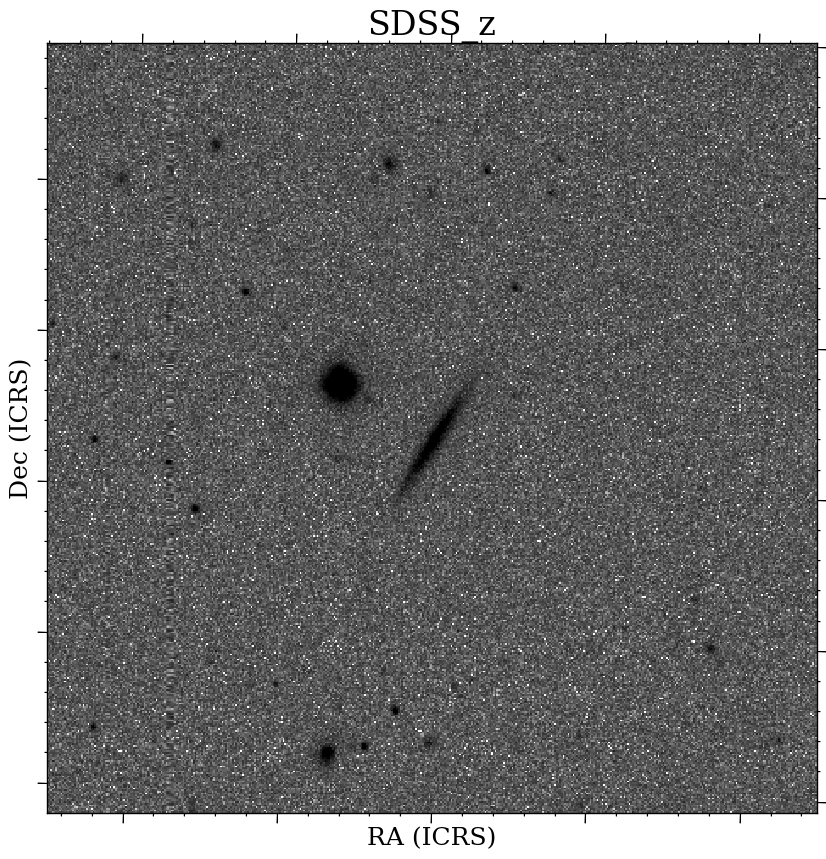

In [32]:
name = '2004gu'
filters_sdss = 'ugriz'
for filter in filters_sdss:
    plot_fits(f'images/{name}/SDSS_{filter}.fits')